# Assignment 7 Solution
This assignment is collaborated by Jingting Dai and Hongjie Guan. Hongjie finished A07.1 and Jingting finished A07.2.

## A07.1 - Correlation MSTs

Task: Build MSTs from correlations and analyze them
+ from the correlation matrices, build the Minimum Spanning
Trees (see lecture)
+ assign the correct ticker (’AAPL’, ’AMZN’, ...) as an attribute to the
nodes and calculate the degrees
+ compare the MST degree distributions of the 1 hour, 1 minute,
Normal and One-Factor correlations

In [1]:
import numpy as np
import os
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['figure.figsize'] = (12, 6)

In [69]:
def import_datasets(datasets_folder):
    d={} #empty dictionary
    for item in os.listdir(datasets_folder):
        if 'npy' in item:
            item_path = os.path.join(datasets_folder,item)
            item_full_name = item.split(".")[0]
            item = item_full_name.split("_",1)[1]
            print("dataset named "+item+" imported")
            d["{}".format(item)] = np.load(item_path)
    print("finish importing")
    return d

In [70]:
# import npy files
cormats = import_datasets(r'data-assignment7\New Folder With Items')

dataset named 1h imported
dataset named 1m imported
dataset named gaussian_1h imported
dataset named gaussian_1m imported
dataset named onefactor_1h imported
dataset named onefactor_1m imported
finish importing


In [71]:
cormats

{'1h': array([[ 1.        ,  0.16724079,  0.17792163, ...,  0.0185428 ,
         -0.04161977,  0.157766  ],
        [ 0.16724079,  1.        ,  0.46343185, ...,  0.28985369,
          0.20418909,  0.29171091],
        [ 0.17792163,  0.46343185,  1.        , ...,  0.39057488,
          0.24218336,  0.24357246],
        ...,
        [ 0.0185428 ,  0.28985369,  0.39057488, ...,  1.        ,
          0.42720044,  0.44063307],
        [-0.04161977,  0.20418909,  0.24218336, ...,  0.42720044,
          1.        ,  0.41781517],
        [ 0.157766  ,  0.29171091,  0.24357246, ...,  0.44063307,
          0.41781517,  1.        ]]),
 '1m': array([[1.        , 0.16174328, 0.29933708, ..., 0.21205377, 0.26330366,
         0.28766365],
        [0.16174328, 1.        , 0.2303112 , ..., 0.18402302, 0.23935938,
         0.35348702],
        [0.29933708, 0.2303112 , 1.        , ..., 0.2000015 , 0.27890206,
         0.29681243],
        ...,
        [0.21205377, 0.18402302, 0.2000015 , ..., 1.        

In [72]:
# import stocknames to form the ticker
with open(r'data-assignment7\New Folder With Items\stocknames.txt') as f:
    lines = f.readlines()
    
tickers={}
for i in range(0,len(lines)):
    tickers[i]=lines[i].strip()
print("The stocknames are:")
print(tickers)

The stocknames are:
{0: 'AAPL', 1: 'ABBV', 2: 'ABT', 3: 'ACN', 4: 'AIG', 5: 'ALL', 6: 'AMGN', 7: 'AMZN', 8: 'APA', 9: 'APC', 10: 'AXP', 11: 'BA', 12: 'BAC', 13: 'BAX', 14: 'BIIB', 15: 'BK', 16: 'BMY', 17: 'C', 18: 'CAT', 19: 'CL', 20: 'CMCSA', 21: 'COF', 22: 'COP', 23: 'COST', 24: 'CSCO', 25: 'CVS', 26: 'CVX', 27: 'DD', 28: 'DIS', 29: 'DOW', 30: 'DVN', 31: 'EBAY', 32: 'EMC', 33: 'EMR', 34: 'EXC', 35: 'F', 36: 'FB', 37: 'FCX', 38: 'FDX', 39: 'FOXA', 40: 'GD', 41: 'GE', 42: 'GILD', 43: 'GM', 44: 'GOOG', 45: 'GS', 46: 'HAL', 47: 'HD', 48: 'HON', 49: 'HPQ', 50: 'IBM', 51: 'INTC', 52: 'JNJ', 53: 'JPM', 54: 'KO', 55: 'LLY', 56: 'LMT', 57: 'LOW', 58: 'MA', 59: 'MCD', 60: 'MDLZ', 61: 'MDT', 62: 'MET', 63: 'MMM', 64: 'MO', 65: 'MON', 66: 'MRK', 67: 'MS', 68: 'MSFT', 69: 'NKE', 70: 'NOV', 71: 'NSC', 72: 'ORCL', 73: 'OXY', 74: 'PEP', 75: 'PFE', 76: 'PG', 77: 'PM', 78: 'QCOM', 79: 'RTN', 80: 'SBUX', 81: 'SLB', 82: 'SO', 83: 'SPG', 84: 'T', 85: 'TGT', 86: 'TWX', 87: 'TXN', 88: 'UNH', 89: 'UNP', 90:

In [73]:
Eigenvalues = {}
Eigenvectors = {}
for name,matrix in cormats.items():
    eigenval,  eigenvec = np.linalg.eig(matrix)
    Eigenvalues[name] = eigenval
    Eigenvectors[name] = eigenvec
    
len(Eigenvalues)

6

In [74]:
distance_matrics={n : np.sqrt(2*(1-cormat)) for n,cormat in cormats.items()}
len(distance_matrics)

6

In [96]:
graphs = {}
for name,matrix in distance_matrics.items():
    # create graphs
    graphs[name]= nx.from_numpy_matrix(matrix)
    # set label for nodes in each graph
    nx.set_node_attributes(graphs[name], tickers, 'ticker')

In [97]:
MSTs = {n : nx.minimum_spanning_tree(g,'weight') for n,g in graphs.items()}

In [98]:
# check if 'ticker' is assigned correctly
print(nx.get_node_attributes(MSTs["1h"], 'ticker'))

{0: 'AAPL', 1: 'ABBV', 2: 'ABT', 3: 'ACN', 4: 'AIG', 5: 'ALL', 6: 'AMGN', 7: 'AMZN', 8: 'APA', 9: 'APC', 10: 'AXP', 11: 'BA', 12: 'BAC', 13: 'BAX', 14: 'BIIB', 15: 'BK', 16: 'BMY', 17: 'C', 18: 'CAT', 19: 'CL', 20: 'CMCSA', 21: 'COF', 22: 'COP', 23: 'COST', 24: 'CSCO', 25: 'CVS', 26: 'CVX', 27: 'DD', 28: 'DIS', 29: 'DOW', 30: 'DVN', 31: 'EBAY', 32: 'EMC', 33: 'EMR', 34: 'EXC', 35: 'F', 36: 'FB', 37: 'FCX', 38: 'FDX', 39: 'FOXA', 40: 'GD', 41: 'GE', 42: 'GILD', 43: 'GM', 44: 'GOOG', 45: 'GS', 46: 'HAL', 47: 'HD', 48: 'HON', 49: 'HPQ', 50: 'IBM', 51: 'INTC', 52: 'JNJ', 53: 'JPM', 54: 'KO', 55: 'LLY', 56: 'LMT', 57: 'LOW', 58: 'MA', 59: 'MCD', 60: 'MDLZ', 61: 'MDT', 62: 'MET', 63: 'MMM', 64: 'MO', 65: 'MON', 66: 'MRK', 67: 'MS', 68: 'MSFT', 69: 'NKE', 70: 'NOV', 71: 'NSC', 72: 'ORCL', 73: 'OXY', 74: 'PEP', 75: 'PFE', 76: 'PG', 77: 'PM', 78: 'QCOM', 79: 'RTN', 80: 'SBUX', 81: 'SLB', 82: 'SO', 83: 'SPG', 84: 'T', 85: 'TGT', 86: 'TWX', 87: 'TXN', 88: 'UNH', 89: 'UNP', 90: 'UPS', 91: 'USB', 9

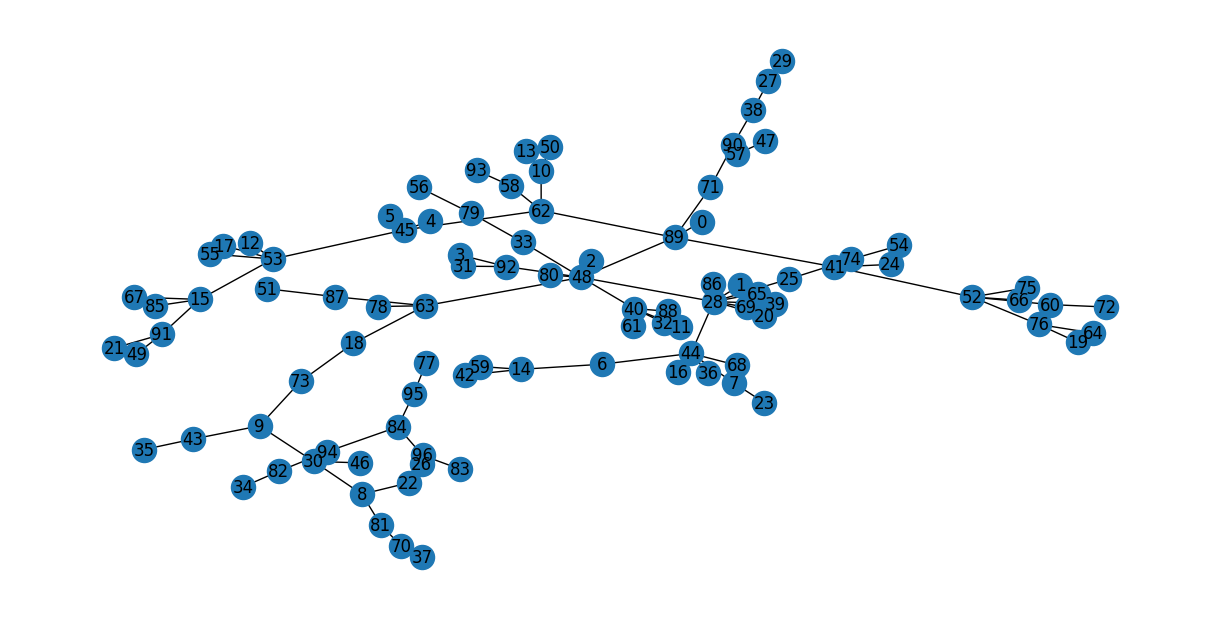

In [99]:
# to visualized the MNT of 1h
nx.draw(MSTs["1h"],with_labels=True)

In [100]:
# compute degree distribution
def compute_degree_distribution(graphs:dict)->dict:
    dd={}
    for k,v in graphs.items():
        degress = v.degree()
        dd[k]=[ degress[i] for i in v.nodes() ]
    return dd

In [101]:
degree_distributions=compute_degree_distribution(MSTs)
print("The degree distributions of each MSTs:\n")
print(degree_distributions)

The degree distributions of each MSTs:

{'1h': [1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 1, 1, 1, 3, 4, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 9, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 5, 3, 1, 2, 6, 4, 1, 1, 8, 1, 1, 1, 5, 5, 1, 1, 1, 2, 2, 1, 2, 1, 4, 4, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 1, 1, 2, 1, 5, 3, 3, 3, 1, 2, 2, 4], '1m': [1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 2, 5, 6, 1, 1, 1, 2, 3, 5, 1, 1, 1, 1, 10, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 2, 1, 1, 1, 26, 1, 2, 2, 3, 6, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 2, 1, 4, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 2], 'gaussian_1h': [4, 2, 1, 1, 1, 1, 4, 1, 1, 1, 3, 2, 1, 3, 1, 3, 2, 3, 2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 3, 1, 1, 6, 2, 3, 2, 1, 2, 3, 3, 1, 1, 2, 2, 1, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 1, 2, 3, 1, 2, 1, 2, 1, 3, 3, 2, 2, 3, 1, 5, 2, 2, 1, 2, 3, 1, 1, 1, 3, 1, 3, 2, 1, 3, 3, 1, 2, 1, 1, 4, 1, 1, 1, 3, 4, 3, 3, 1], 'gaussian_1m': [1, 1, 3, 4, 2, 1, 1, 1, 2, 5, 2, 1,

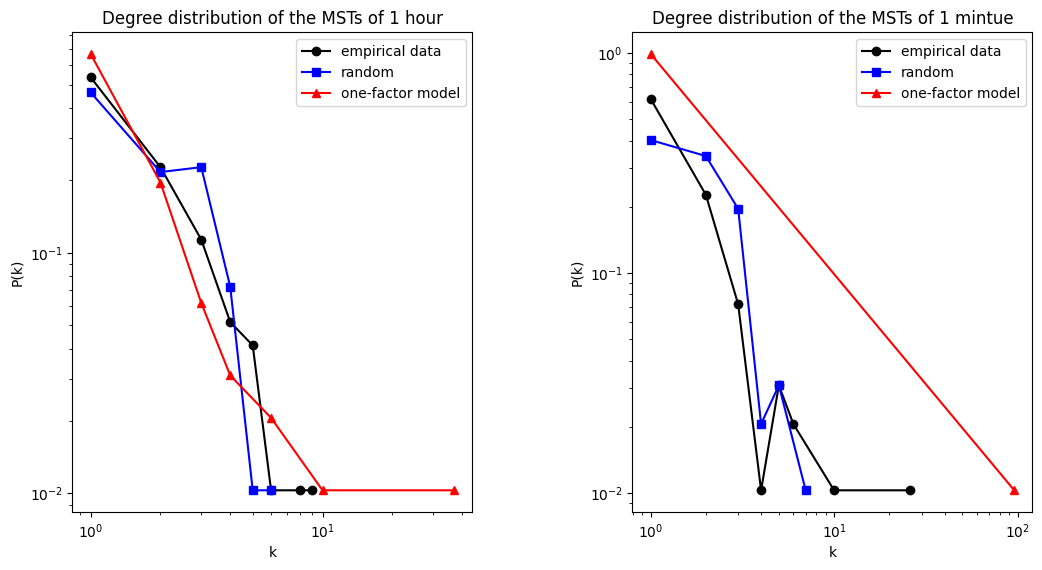

In [104]:
plt.subplot(1,2,1)

k_list_1h=degree_distributions['1h']
k_list_gaussian_1h=degree_distributions['gaussian_1h']
k_list_onefactor_1h=degree_distributions['onefactor_1h']

l=len(k_list_1h)

k_list_1h_unique = np.unique(np.array(degree_distributions['1h'])) 
k_list_gaussian_1h_unique = np.unique(np.array(degree_distributions['gaussian_1h']))
k_list_onefactor_1h_unique = np.unique(np.array(degree_distributions['onefactor_1h']))

P_k_1h = [k_list_1h.count(k)/l for k in k_list_1h_unique]
P_k_gaussian_1h = [k_list_gaussian_1h.count(k)/l for k in k_list_gaussian_1h_unique]
P_k_onefactor_1h = [k_list_onefactor_1h.count(k)/l for k in k_list_onefactor_1h_unique]

plt.plot(k_list_1h_unique, P_k_1h, 'o-',color='k',label="empirical data")
plt.plot(k_list_gaussian_1h_unique, P_k_gaussian_1h,'s-',color='b',label="random" )
plt.plot(k_list_onefactor_1h_unique, P_k_onefactor_1h,'^-',color='r',label="one-factor model" )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend(loc='best')
plt.title("Degree distribution of the MSTs of 1 hour")  

plt.subplot(1,2,2)
k_list_1m=degree_distributions['1m']
k_list_gaussian_1m=degree_distributions['gaussian_1m']
k_list_onefactor_1m=degree_distributions['onefactor_1m']

l=len(k_list_1m)

k_list_1m_unique = np.unique(np.array(degree_distributions['1m'])) 
k_list_gaussian_1m_unique = np.unique(np.array(degree_distributions['gaussian_1m']))
k_list_onefactor_1m_unique = np.unique(np.array(degree_distributions['onefactor_1m']))

P_k_1m = [k_list_1m.count(k)/l for k in k_list_1m_unique]
P_k_gaussian_1m = [k_list_gaussian_1m.count(k)/l for k in k_list_gaussian_1m_unique]
P_k_onefactor_1m = [k_list_onefactor_1m.count(k)/l for k in k_list_onefactor_1m_unique]

plt.plot(k_list_1m_unique, P_k_1m, 'o-',color='k',label="empirical data")
plt.plot(k_list_gaussian_1m_unique, P_k_gaussian_1m,'s-',color='b',label="random" )
plt.plot(k_list_onefactor_1m_unique, P_k_onefactor_1m,'^-',color='r',label="one-factor model" )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.legend(loc='best')
plt.title("Degree distribution of the MSTs of 1 mintue")  

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=1)

plt.show()

## A07.2 - Conclusions

Task: finish the analysis by drawing conclusions 

Answer the following questions (for both timescales):
1. Is there a ‘market mode’?
2. Which are the 5 stocks with highest degree on the 1 minute and
1 hour MST?
3. Is the degree distribution of MSTs qualitatively the same at 1
minute and 1 hour?
4. Is the degree distribution of MSTs well reproduced by the null
Gaussian and One-Factor models?
